# The NumPy ndarray: A Multidimensional Array Object（ndarray: 多维数组对象）

In [1]:
import numpy as np

In [2]:
data = np.random.randn(2, 3)
data

array([[-0.85715084, -0.49596278, -1.38801231],
       [-1.24399055, -0.80755963, -0.26737789]])

In [3]:
data * 10

array([[ -8.57150839,  -4.95962779, -13.88012311],
       [-12.43990551,  -8.07559632,  -2.67377887]])

In [4]:
data + data

array([[-1.71430168, -0.99192556, -2.77602462],
       [-2.4879811 , -1.61511926, -0.53475577]])

In [5]:
data.shape

(2, 3)

In [6]:
data.dtype

dtype('float64')

## 1 Greating ndarrays (创建n维数组)

In [7]:
data1 = [6, 7.5, 8, 9, 5, 10]
arr1 = np.array(data1)
arr1

array([  6. ,   7.5,   8. ,   9. ,   5. ,  10. ])

In [8]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [9]:
arr2.ndim

2

In [10]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [11]:
np.zeros((3, 6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
np.ones((5,8))

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [13]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 2 Data Types for ndarrays

In [14]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.dtype

dtype('float64')

In [15]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [16]:
# 还可以用astype把string里的数字变为实际的数字
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings

array([b'1.25', b'-9.6', b'42'],
      dtype='|S4')

In [17]:
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

要十分注意numpy.string_类型，这种类型的长度是固定的，所以可能会直接截取部分输入而不给警告。

如果转换（casting）失败的话，会给出一个ValueError提示。

In [18]:
# 还可以利用类型的缩写，比如u4就代表unit32
empty_unit32 = np.empty(8, dtype='u4')
empty_unit32

array([         0,          0,  270399677, 3221225472,   29622274,
                1,   29514416,     131073], dtype=uint32)

## 3 Arithmetic with NumPy Arrays（数组计算）

数组之所以重要，是因为不用写for循环就能表达很多操作，这种特性叫做vectorization(向量化)。任何两个大小相等的数组之间的运算，都是element-wise（点对点）

In [19]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [20]:
arr * arr

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [21]:
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [22]:
arr + arr

array([[  2.,   4.,   6.],
       [  8.,  10.,  12.]])

In [23]:
1 / arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [24]:
arr ** 2

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [25]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[  0.,   4.,   1.],
       [  7.,   2.,  12.]])

In [26]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]], dtype=bool)

## 4 Basic Indexing and Slicing（基本的索引和切片）

In [27]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
arr[5:8]

array([5, 6, 7])

In [29]:
arr[5:8] = 12

In [30]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])


这里把12赋给arr[5:8]，其实用到了broadcasted（我觉得应该翻译为广式转变）。这里有一个比较重要的概念需要区分，python内建的list与numpy的array有个明显的区别，这里array的切片后的结果只是一个views（视图），用来代表原有array对应的元素，而不是创建了一个新的array。但list里的切片是产生了一个新的list

In [31]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [32]:
arr_slice[1] = 12345

In [33]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

In [34]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

之所以这样设计是出于性能和内存的考虑，毕竟如果总是复制数据的话，会很影响运算时间。当然如果想要复制，可以使用copy()方法，比如arr[5:8].copy()

In [35]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

有两种方式可以访问单一元素

In [36]:
arr2d[0][2]

3

In [37]:
arr2d[0, 2]

3

In [38]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [39]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
old_values = arr3d[0].copy()

arr3d[0] = 42

arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [41]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [42]:
arr3d[1, 0]

array([7, 8, 9])

In [43]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [44]:
arr2d[:2, 1:] # 前两行，第二列之后

array([[2, 3],
       [5, 6]])

In [45]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [46]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## 5 Boolean Indexing (布尔索引)

In [47]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'],
      dtype='<U4')

In [48]:
data = np.random.randn(7, 4)
data

array([[ 1.21564942, -0.19726644, -1.16038328,  0.81950084],
       [ 1.30895444,  0.412541  ,  1.41647555, -2.58548141],
       [ 0.26020681,  0.43044266,  0.43592178, -1.24491851],
       [ 1.42218181,  0.21574539, -0.21381412,  0.1647793 ],
       [-0.50477427, -1.26105865,  0.39657089,  0.62026498],
       [-1.35380866,  1.84067423,  0.49747083, -0.54075829],
       [ 1.16480624, -0.04529041,  0.48217329,  0.95711876]])

假设每一个name对应data数组中的一行，我们想要选中name为'Bob'的所有行。就像四则运算，用比较运算符（==）

In [49]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [50]:
data[names == 'Bob']

array([[ 1.21564942, -0.19726644, -1.16038328,  0.81950084],
       [ 1.42218181,  0.21574539, -0.21381412,  0.1647793 ]])

注意：布尔数组和data数组的长度要一样。

我们可以选中names=='Bob'的行，然后索引列

In [51]:
data[names == 'Bob', 2:]

array([[-1.16038328,  0.81950084],
       [-0.21381412,  0.1647793 ]])

In [52]:
data[names == 'Bob', 3]

array([ 0.81950084,  0.1647793 ])

选中除了'Bob'外的所有行，可以用!=或者~

In [53]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True], dtype=bool)

In [54]:
data[~(names == 'Bob')]

array([[ 1.30895444,  0.412541  ,  1.41647555, -2.58548141],
       [ 0.26020681,  0.43044266,  0.43592178, -1.24491851],
       [-0.50477427, -1.26105865,  0.39657089,  0.62026498],
       [-1.35380866,  1.84067423,  0.49747083, -0.54075829],
       [ 1.16480624, -0.04529041,  0.48217329,  0.95711876]])

In [55]:
cond = names == 'Bob'
data[~cond]

array([[ 1.30895444,  0.412541  ,  1.41647555, -2.58548141],
       [ 0.26020681,  0.43044266,  0.43592178, -1.24491851],
       [-0.50477427, -1.26105865,  0.39657089,  0.62026498],
       [-1.35380866,  1.84067423,  0.49747083, -0.54075829],
       [ 1.16480624, -0.04529041,  0.48217329,  0.95711876]])

In [56]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [57]:
data[mask]

array([[ 1.21564942, -0.19726644, -1.16038328,  0.81950084],
       [ 0.26020681,  0.43044266,  0.43592178, -1.24491851],
       [ 1.42218181,  0.21574539, -0.21381412,  0.1647793 ],
       [-0.50477427, -1.26105865,  0.39657089,  0.62026498]])

用布尔索引总是会返回一份新创建的数据，原本的数据不会被改变。

更改值的方式也很直觉。比如我们想让所有负数变为0

In [58]:
data[data < 0] = 0
data

array([[ 1.21564942,  0.        ,  0.        ,  0.81950084],
       [ 1.30895444,  0.412541  ,  1.41647555,  0.        ],
       [ 0.26020681,  0.43044266,  0.43592178,  0.        ],
       [ 1.42218181,  0.21574539,  0.        ,  0.1647793 ],
       [ 0.        ,  0.        ,  0.39657089,  0.62026498],
       [ 0.        ,  1.84067423,  0.49747083,  0.        ],
       [ 1.16480624,  0.        ,  0.48217329,  0.95711876]])

In [59]:
data[names != 'Joe'] = 7
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 1.30895444,  0.412541  ,  1.41647555,  0.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.        ,  1.84067423,  0.49747083,  0.        ],
       [ 1.16480624,  0.        ,  0.48217329,  0.95711876]])

## 6 Fancy Indexing(花式索引)

In [60]:
arr = np.zeros((8, 4))
arr

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [61]:
for i in range(8):
    arr[i] = i

In [62]:
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

想要按一定顺序选出几行，可以用一个整数list或整数ndarray来指定顺序

In [63]:
arr[[0,6,1,7]]

array([[ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.],
       [ 1.,  1.,  1.,  1.],
       [ 7.,  7.,  7.,  7.]])

In [64]:
arr[[-1,-7,-2,-8]]

array([[ 7.,  7.,  7.,  7.],
       [ 1.,  1.,  1.,  1.],
       [ 6.,  6.,  6.,  6.],
       [ 0.,  0.,  0.,  0.]])

In [65]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [66]:
arr[[1, 5, 6, 2], [0, 3, 1, 2]]

array([ 4, 23, 25, 10])

可以看到[ 4, 23, 29, 10]分别对应(1, 0), (5, 3), (7, 1), (2, 2)。不论数组有多少维，fancy indexing的结果总是一维。

对于长方形区域，有下面的方法来截取

In [67]:
arr[[1, 5, 6, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [24, 27, 25, 26],
       [ 8, 11,  9, 10]])

要记住，fancy indexing和切片不同，得到的是一个新的array。

## 7 Transposing Arrays and Swapping Axes（数组转置和轴交换）

转置也是返回一个view，而不是新建一个数组。有两种方式，一个是transpose方法，一个是T属性

In [68]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [69]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

做矩阵计算的时候，这个功能很常用，计算矩阵乘法的时候，用np.dot

In [70]:
arr = np.arange(8).reshape((4, 2))
print(arr.T)
print(arr)

[[0 2 4 6]
 [1 3 5 7]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [71]:
np.dot(arr.T, arr)

array([[56, 68],
       [68, 84]])

上面的例子是 (2x4) x (4x2) = (2x2)。得到的结果是2x2维，就是普通的矩阵乘法。

对于多维数组，transpose会接受由轴数字组成的tuple，来交换轴

In [72]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [73]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

这里，second axis(1)被设为第一个，first axis(0)第二个，最后的axis没变。

使用.T来转置swapping axes(交换轴)的一个特殊情况，ndarray有方法叫做swapaxes，这个方法取两个axis值，并交换这两个轴

In [74]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes也是返回view，不生成新的data。

# Universal Functions: Fast Element-Wise Array Functions（通用函数：快速点对点数组函数）

In [75]:
import numpy as np

In [76]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [78]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [79]:
x = np.random.randn(8)
y = np.random.randn(8)

In [80]:
x

array([ 1.03086953,  0.02689822, -1.21813663, -1.33254577, -0.85993923,
        0.20966038, -0.78927682,  0.59230654])

In [81]:
y

array([-0.24307253,  1.96646875, -0.58551925, -0.35422887, -0.91236927,
       -0.68167392,  1.95192316,  0.7950658 ])

In [82]:
np.maximum(x, y)

array([ 1.03086953,  1.96646875, -0.58551925, -0.35422887, -0.85993923,
        0.20966038,  1.95192316,  0.7950658 ])

In [83]:
arr = np.random.randn(7) * 5
arr

array([-4.64650069,  0.23870632,  4.35549875, -5.49722484,  0.06110818,
        6.68173911, -3.52023951])

In [84]:
remainder, whole_part = np.modf(arr)

In [85]:
remainder

array([-0.64650069,  0.23870632,  0.35549875, -0.49722484,  0.06110818,
        0.68173911, -0.52023951])

In [86]:
whole_part

array([-4.,  0.,  4., -5.,  0.,  6., -3.])

In [87]:
np.abs(arr)

array([ 4.64650069,  0.23870632,  4.35549875,  5.49722484,  0.06110818,
        6.68173911,  3.52023951])

In [88]:
np.square(arr)

array([  2.15899686e+01,   5.69807065e-02,   1.89703693e+01,
         3.02194809e+01,   3.73420985e-03,   4.46456376e+01,
         1.23920862e+01])

In [89]:
np.sign(arr)

array([-1.,  1.,  1., -1.,  1.,  1., -1.])

In [90]:
np.rint(arr)

array([-5.,  0.,  4., -5.,  0.,  7., -4.])

# Array-Oriented Programming with Arrays（数组导向编程）

向量化的数组运算比纯python同等程度的运算要快很多。

一个简单的例子，假设我们想要评价函数sqrt(x^2 + y^2)。np.meshgrid函数取两个1维的数组，产生一个2维的矩阵，对应于所有两个数组中(x, y)的组合：

In [91]:
import numpy as np

meshgrid函数用两个坐标轴上的点在平面上画网格。用法：

[X,Y]=meshgrid(x,y)

[X,Y]=meshgrid(x)与[X,Y]=meshgrid(x,x)是等同的

[X,Y,Z]=meshgrid(x,y,z)生成三维数组，可用来计算三变量的函数和绘制三维立体图

这里，主要以[X,Y]=meshgrid(x,y)为例，来对该函数进行介绍。

[X,Y] = meshgrid(x,y) 将向量x和y定义的区域转换成矩阵X和Y,其中矩阵X的行向量是向量x的简单复制，而矩阵Y的列向量是向量y的简单复制(注：下面代码中X和Y均是数组，在文中统一称为矩阵了)。

假设x是长度为m的向量，y是长度为n的向量，则最终生成的矩阵X和Y的维度都是 nm （注意不是mn）。

In [92]:
m, n = (5, 3)
x = np.linspace(0, 1, m)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)

In [93]:
x

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [94]:
y

array([ 0. ,  0.5,  1. ])

In [95]:
X

array([[ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]])

In [96]:
Y

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

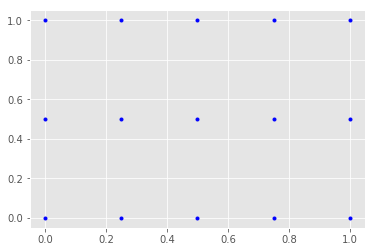

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.plot(X, Y, marker='.', color='blue', linestyle='none')

In [98]:
z = [i for i in zip(X.flat, Y.flat)]
z

[(0.0, 0.0),
 (0.25, 0.0),
 (0.5, 0.0),
 (0.75, 0.0),
 (1.0, 0.0),
 (0.0, 0.5),
 (0.25, 0.5),
 (0.5, 0.5),
 (0.75, 0.5),
 (1.0, 0.5),
 (0.0, 1.0),
 (0.25, 1.0),
 (0.5, 1.0),
 (0.75, 1.0),
 (1.0, 1.0)]

In [99]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points) # xs和ys是一样的
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [100]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

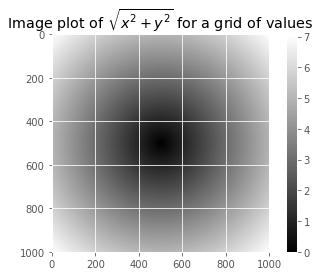

In [101]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## 1 Expressing Conditional Logic as Array Operations (像数组操作一样表示逻辑条件)

numpy.where函数是一个向量版的三相表达式，x if condition else y。假设我们有一个布尔数组和两个数组：

In [102]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [103]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [104]:
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

np.where中第二个和第三个参数不用必须是数组。where在数据分析中一个典型的用法是基于一个数组，产生一个新的数组值。假设我们有一个随机数字生成的矩阵，我们想要把所有的正数变为2，所有的负数变为-2。用where的话会非常简单：

In [105]:
arr = np.random.randn(4, 4)
arr

array([[ 0.14915575, -0.41400409, -0.39831569,  0.51124099],
       [-0.24141524, -0.30782482, -0.51562137, -2.01090705],
       [-0.41736876,  0.19633065,  1.02578662, -0.42290954],
       [ 0.06920773, -0.54882792,  0.18829448, -1.15248993]])

In [106]:
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2,  2],
       [-2, -2, -2, -2],
       [-2,  2,  2, -2],
       [ 2, -2,  2, -2]])

In [107]:
np.where(arr > 0, 2, arr)

array([[ 2.        , -0.41400409, -0.39831569,  2.        ],
       [-0.24141524, -0.30782482, -0.51562137, -2.01090705],
       [-0.41736876,  2.        ,  2.        , -0.42290954],
       [ 2.        , -0.54882792,  2.        , -1.15248993]])

## 2 Mathematical and Statistical Methods (数学和统计方法)

In [108]:
arr = np.random.randn(5, 4)
arr

array([[ 0.59318941, -0.67061193,  0.94041505, -0.09589285],
       [-0.06335366,  0.27664044,  0.11531616, -1.7673183 ],
       [-0.04144191, -0.63363696, -0.43524142, -0.17870007],
       [-0.2935932 , -0.93686072, -0.41156545,  0.0289246 ],
       [ 1.34657562, -0.17815109,  0.0818765 ,  0.29467041]])

In [109]:
arr.mean()

-0.10143796939639896

In [110]:
np.mean(arr)

-0.10143796939639896

In [111]:
arr.sum()

-2.0287593879279791

In [112]:
arr.mean(axis=1)

array([ 0.19177492, -0.35967884, -0.32225509, -0.40327369,  0.38624286])

In [113]:
arr.sum(axis=0)

array([ 1.54137626, -2.14262028,  0.29080085, -1.71831622])

这里arr.mean(1)表示，compute mean acros the columns(计算各列之间的平均值)。arr.sum(0)表示，compute sum down the rows(计算各行总和)。

In [114]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [115]:
np.cumsum?

In [116]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [117]:
arr.cumsum(axis=0) # 沿着行加法

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [118]:
arr.cumprod(axis=1) # 沿着列乘法

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

## 3 Methods for Boolean Arrays（布尔数组的方法）

In [119]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

36

有两个其他方法，any和all，对于布尔数组特别有用。any检测数组中只要有一个ture返回就是true，而all检测数组中都是true才会返回true。

In [120]:
bools = np.array([False, False, True, False])

In [121]:
bools.any()

True

In [122]:
bools.all()

False

## 4 Sorting（排序）

In [123]:
arr = np.random.randn(6)
arr

array([-0.7467153 , -0.34619156,  1.98412875,  1.26461662, -1.53217985,
        0.37009969])

In [124]:
arr.sort()

In [125]:
arr

array([-1.53217985, -0.7467153 , -0.34619156,  0.37009969,  1.26461662,
        1.98412875])

In [126]:
arr = np.random.randn(5, 3)
arr

array([[ 1.30047559, -0.65380732, -0.19182092],
       [ 1.21431736,  0.96898193, -0.48278368],
       [ 0.96465516, -1.22036292,  0.18204762],
       [-0.47020002,  0.96967587, -1.16415365],
       [-1.38563656,  0.34292441,  1.00439121]])

In [127]:
arr.sort(1)

In [128]:
arr

array([[-0.65380732, -0.19182092,  1.30047559],
       [-0.48278368,  0.96898193,  1.21431736],
       [-1.22036292,  0.18204762,  0.96465516],
       [-1.16415365, -0.47020002,  0.96967587],
       [-1.38563656,  0.34292441,  1.00439121]])

In [129]:
arr.sort(0)
arr

array([[-1.38563656, -0.47020002,  0.96465516],
       [-1.22036292, -0.19182092,  0.96967587],
       [-1.16415365,  0.18204762,  1.00439121],
       [-0.65380732,  0.34292441,  1.21431736],
       [-0.48278368,  0.96898193,  1.30047559]])

上面是直接调用数组的sort方法，会改变原有数组的顺序。但如果使用np.sort()函数的话，会生成一个新的排序后的结果。

## 5 Unique and Other Set Logic (单一性和其他集合逻辑)

In [130]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'],
      dtype='<U4')

In [131]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

np.in1d, 测试一个数组的值是否在另一个数组里，返回一个布尔数组：

In [132]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [133]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

# Linear Algebra (线性代数)

在MATLAB里，* 代表矩阵乘法。但是在numpy里，*表示element-wise prodct。要想做到矩阵乘法，要用多函数dot:

In [134]:
import numpy as np

In [135]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [136]:
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [137]:
y

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

In [138]:
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

In [139]:
np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

In [140]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [141]:
x @ np.ones(3)

array([  6.,  15.])

In [142]:
A = np.mat("0 1 2;1 0 3;4 -3 8")
A

matrix([[ 0,  1,  2],
        [ 1,  0,  3],
        [ 4, -3,  8]])

In [143]:
inv = np.linalg.inv(A)
inv

matrix([[-4.5,  7. , -1.5],
        [-2. ,  4. , -1. ],
        [ 1.5, -2. ,  0.5]])

In [144]:
A * inv

matrix([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

In [145]:
X = np.random.randn(5, 5)
X

array([[ 0.78053993,  1.71167492,  0.0575527 , -0.52069682, -0.15236898],
       [ 0.28370474,  1.14294579,  0.22179888, -0.67050721, -1.1207272 ],
       [-1.07693713, -0.14003333,  0.53321491, -0.09600967, -0.63246098],
       [-0.29080766, -0.59601657, -0.99651603,  0.69904945, -0.25003293],
       [ 2.54497187, -0.01377286,  0.19635506, -1.08915613,  1.50996005]])

In [146]:
X = np.round(np.random.randn(5, 5), 3)
X

array([[ 0.495,  1.207,  1.959,  0.209, -0.552],
       [ 0.911,  0.354,  0.36 , -0.475,  0.81 ],
       [-0.758, -0.87 , -1.794,  0.451, -1.347],
       [-0.789, -0.82 , -0.82 , -0.161, -0.221],
       [-0.165,  1.085, -0.402,  1.361,  0.34 ]])

# Pseudorandom Number Generation（伪随机数生成）

numpy.random模块提供了很多生成随机数的函数，可以选择生成符合某种概率分布的随机数。比如我们可以用normal得到一个4 x 4的，符合标准正态分布的数组：

In [147]:
import numpy as np
samples = np.random.normal(size=(4, 4))
samples

array([[ 2.25857137, -0.0440268 , -0.90915047, -0.11085381],
       [-0.27979544, -0.62913181, -0.45933881, -0.05407751],
       [-0.57646086,  0.28356644,  1.06070231, -1.14850023],
       [ 3.18599423,  0.46390611,  0.10937444,  0.89653386]])

相对的，python内建的random模块一次只能生成一个样本。在生成大量样本方法，numpy.random是非常快的：

In [148]:
from random import normalvariate

N = 1000000

In [149]:
%timeit sample = [normalvariate(0, 1) for _ in range(N)]

1.11 s ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [150]:
%timeit np.random.normal(size=N)

39.5 ms ± 781 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


之所以称之为伪随机数，是因为随机数生成算法是根据seed来生成的。也就是说，只要seed设置一样，每次生成的随机数是相同的：

In [151]:
np.random.seed(1234)

当然，这个seed是全局的，如果想要避免全局状态，可以用numpy.random.RandomState来创建一个独立的生成器：

In [152]:
rng = np.random.RandomState(1234)

In [153]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# Example Random Walks（一个例子：随机漫步）

这个例子让我了解一个在实际任务中如何利用数组操作。首先一个最简单的随机漫步：从0开始，步幅为1和-1，以相同的概率出现。

下面是纯python的实现方法，1000步：

In [154]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
walk[:5]

[0, 1, 2, 1, 0]

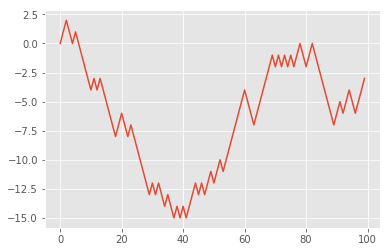

In [157]:
plt.plot(walk[:100])

随机漫步其实就是一个简单的累加。而用np.random能更快：

In [158]:
import numpy as np

In [159]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)

In [160]:
walk = steps.cumsum()

In [161]:
walk.min()

-9

In [162]:
walk.max()

60

一个更复杂的统计值是在哪一步random walk到达了一个指定值。我们想知道从0走出10步用了多久，不论是正方向还是负方向。np.abs(walk) >= 10给我们一个布尔数组告诉我们是否超过10，但我们想要第一次出现的10或-10。因此，我们利用argmax来计算，这个会返回布尔数组中最大值的索引(Ture是最大值)：

In [163]:
(np.abs(walk) >= 10).argmax()

297

注意，使用argmax并不总是效率的，因为它总会搜索整个数组。在这里例子里，一旦True被找到了，我们就返回为最大值。

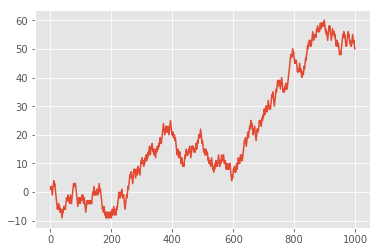

In [164]:
plt.plot(walk[:1000])

## Simulating Many Random Walks at Once（一次模拟多个随机漫步）

假设我们一次要模拟5000个随机漫步。传入一个2-tuple，np.random会生成一个二维数组，然后我们沿着每行来计算累加，这样就能一次模拟5000个：

In [165]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [166]:
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ..., 
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]])

In [167]:
walks.max()

122

In [168]:
walks.min()

-128

在这些漫步模拟中，我们想找到30步以上的。用any方法：

In [169]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True, False,  True], dtype=bool)

In [170]:
hits30.sum()

3368

上面的step只是像翻硬币一样二选一，我们也可以用一个概率函数来生成：

In [171]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))